# Introduction to Image Data

In computer vision, we normally solve one of the following problems:

* **Image Classification** is the simplest task, when we need to classify an image into one of many pre-defined categories, for example, distinguish a cat from a dog on a photograph, or recognize a handwritten digit.

* **Object Detection** is more difficult task, in which we need to find known objects on the picture and localize them, i.e. return the **bounding box** for each of recognized objects.

* **Segmentation** is similar to object detection, but instead of giving bounding box we need to return an exact pixel map outlining each of the recognized objects.  

![](https://i.stack.imgur.com/mFBCV.png)

Image taken from [CS224d Stanford Course](http://cs224d.stanford.edu/index.html)

## Images as Tensors

Computer Vision works with Images. As you probably know, images consist of pixels, so they can be thought of as a rectangular collection (array) of pixels.

In the first part of this tutorial, we will deal with handwritten digit recognition. We will use the MNIST dataset, which consists of grayscale images of handwritten digits, 28x28 pixels. Each image can be represented as 28x28 array, and elements of this array would denote intensity of corresponding pixel - either in the scale of range 0 to 1 (in which case floating point numbers are used), or 0 to 255 (integers). A popular python library called `numpy` is often used with computer vision tasks, because it allows to operate with multidimensional arrays effectively.

To deal with color images, we need some way to represent colors. In most cases, we represent each pixel by 3 intensity values, corresponding to Red (R), Green (G) and Blue (B) components. This colour encoding is called RGB, and thus colour image of size $W\times H$ will be represented as an array of size $3\times H\times W$ (sometimes the order of components might be different, but the idea is the same).

Multi-dimentional arrays are also called **tensors**. Using tensors to represent images also has an advantage, because we can use an extra dimension to store a sequence of images. For example, to represent a video fragment consisting of 200 frames with 800x600 dimension, we may use the tensor of size 200x3x600x800.

## Import Packages and Load MNIST Dataset


In [2]:
#Import the packages needed.
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'torchvision'

In [3]:
from torchvision.transforms import ToTensor

data_train = torchvision.datasets.MNIST('./data',
        download=True,train=True,transform=ToTensor())
data_test = torchvision.datasets.MNIST('./data',
        download=True,train=False,transform=ToTensor())

ModuleNotFoundError: No module named 'torchvision'

You can experiment with many built in datasets since  PyTorch has a [number of datasets](https://pytorch.org/docs/stable/torchvision/datasets.html) easily available right from the library.  Here we are using the `torchvison.datasets.MNIST`, which returns the data in the form of PIL images and then we call `ToTensor()` to convert the data to tensors.

## Visualize the Digits Dataset
Now that we have downloaded the dataset we can visualize some of the digits

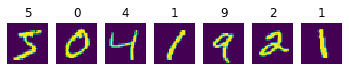

In [16]:
fig,ax = plt.subplots(1,7)
for i in range(7):
    ax[i].imshow(data_train[i][0].view(28,28))
    ax[i].set_title(data_train[i][1])
    ax[i].axis('off')

## Dataset Structure

We have a total of 6000 training images and 1000 testing images. Its important to split out the data for training and testing. We also want to do some data exploration to get a better idea of what our data looks like



Each sample is a tuple in the following structure:
 * First element is a tensor of 1x28x28 size
 * Second element is a **label** that specifies which digit is represented by the tensor 

In [30]:
print('Training samples:',len(data_train))
print('Test samples:',len(data_test))

print('Tensor size:',data_train[0][0].size())
print('First 10 digits are:', [data_train[i][1] for i in range(10)])

Tensor size: torch.Size([1, 28, 28])
First 10 digits are: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


All pixel intensities of the images are represented by floating-point values in between 0 and 1:

In [33]:
print('Min intensity value: ',data_train[0][0].min().item())
print('Max intensity value: ',data_train[0][0].max().item())

Min intensity value:  0.0
Max intensity value:  1.0


If you are planning to load your own images, it is important to make sure that all values are scaled to the range [0,1] before we start training a neural network.

We have loaded training and test datasets, and we are ready to start training our first neural network!